In [1]:
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import cluster


import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

C:\Users\neha\AppData\Local\Temp\ipykernel_21452\3345913984.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme


In [2]:
ddir = "universe_8/"
stars = pd.read_csv(ddir + 'combined_stars.csv') 
Name, X_stars, Y_stars, rad_velocity, parallax = stars["Name"] , stars["X"], stars["Y"], stars["RadialVelocity"], stars["Parallax"]


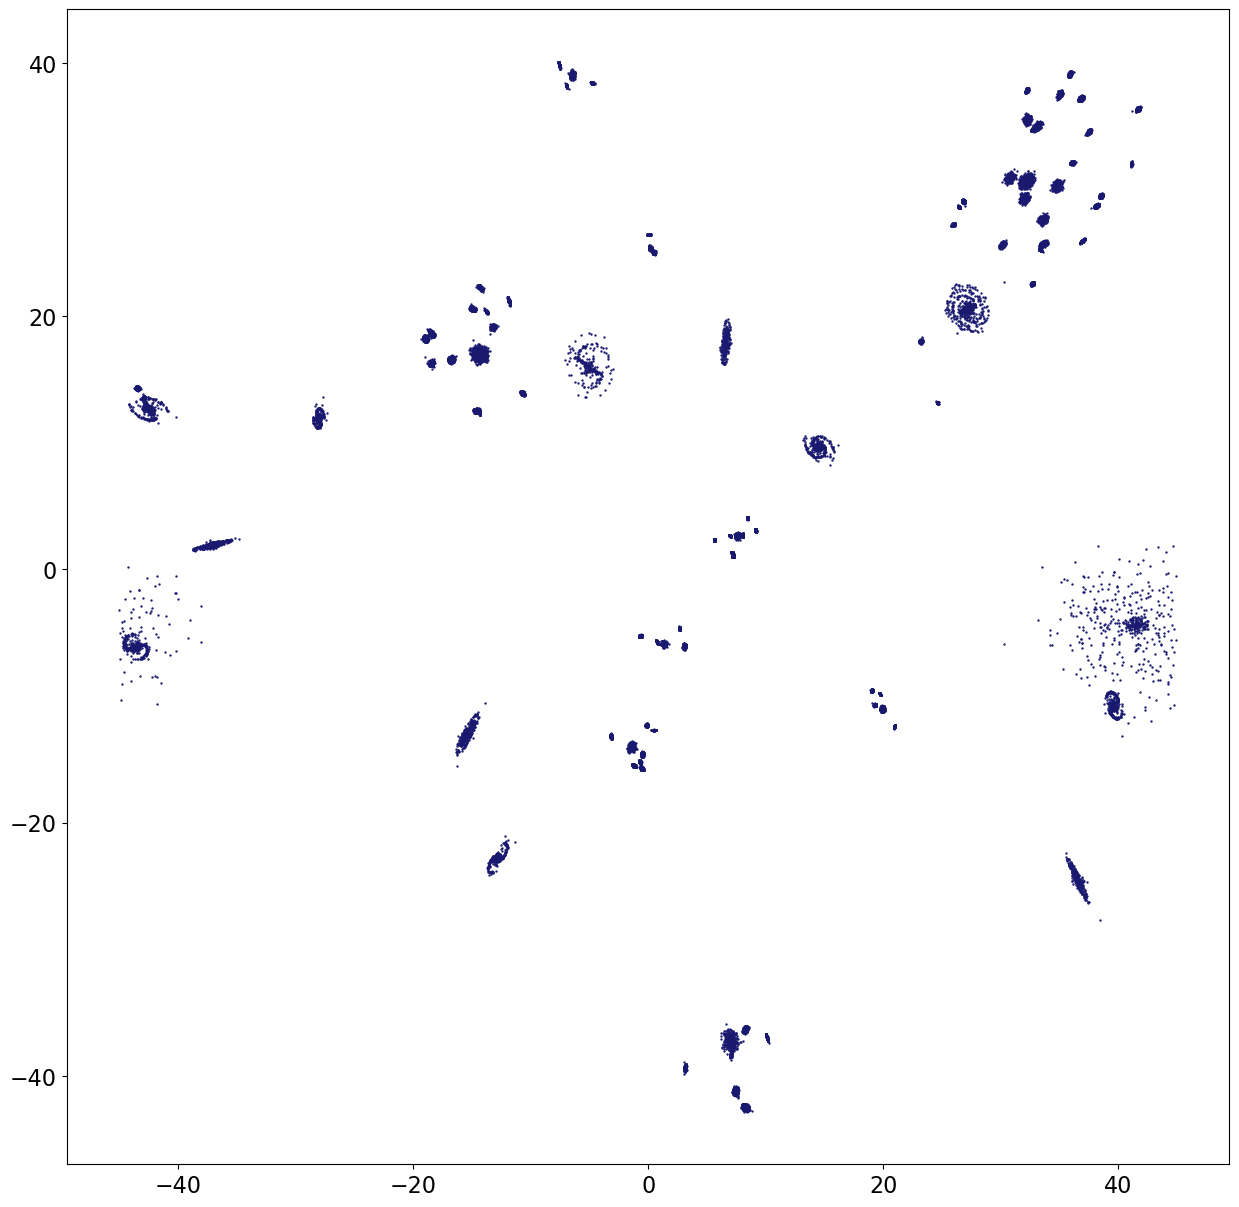

In [4]:
# take the index of the star iff it's above a certain parallax - try to get the far stars
star_index = [i for i, x in enumerate(parallax) if x <= 0.0001]

# find the X and Y pos of the respctive indexes of the far away stars
X_pos = [X_stars[i] for i in star_index]  
Y_pos = [Y_stars[i] for i in star_index]


# plot
fig = plt.figure(figsize=(15, 15))  
ax = fig.add_subplot(1, 1, 1)    
ax.scatter(X_pos, Y_pos, s=0.5, c='midnightblue') 

ax.set_facecolor('white')   
plt.show()  


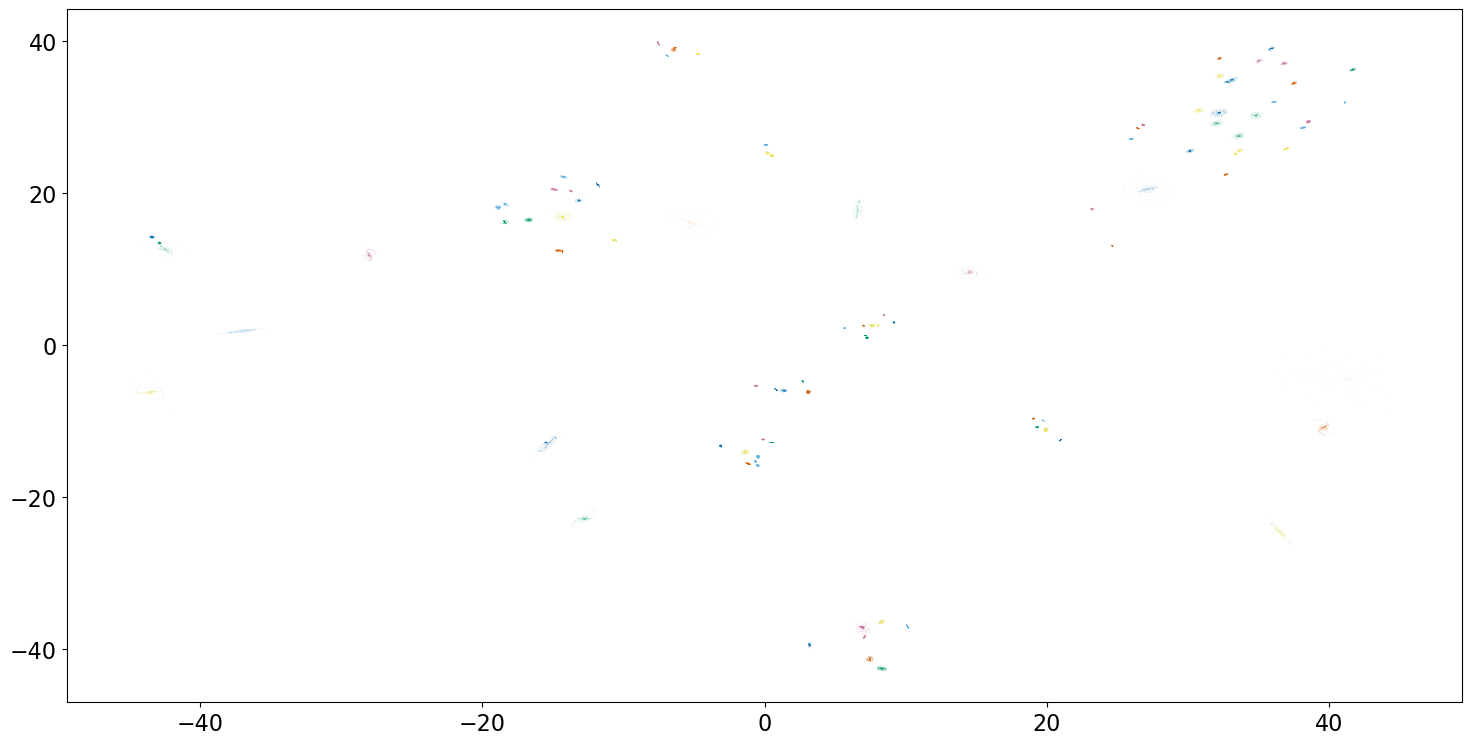

In [5]:
coords = np.ndarray((len(X_pos), 2))
for i, j in enumerate(X_pos):
    coords[i] = [j, Y_pos[i]] 

clustering = cluster.DBSCAN(eps=0.3, min_samples=40, n_jobs=-1).fit(coords)

labels = clustering.labels_ 


fig, ax = plt.subplots(figsize=(18, 9))   

for clust in range(0, max(labels) + 1):
    #print()
    Xk = coords[labels == clust]
    ax.scatter(Xk[:, 0], Xk[:, 1], alpha=0.8, s=0.02, linewidths=0)


ax.scatter(coords[labels == -1, 0], coords[labels == -1, 1], alpha=0.3, s=0.02, linewidths=0) 

#fig.savefig('dbscan.png', dpi=1500) 
plt.show()

TypeError: 'DBSCAN' object is not iterable